# Compare models trained on mixed class data

This compares several different models trained on **mixed** *longliner*,
*trawler* and *purse seiner* data.

**NOTE: this was somewhat unstable. Running multiple times yielded significantly different results, 
  depending the data split.  I set seeds everywhere and now the output is stable. However, this tells 
  me that we want more data!**

In [1]:
%matplotlib inline
import numpy as np
import data
from evaluate_model import evaluate_model, train_model, compare_auc
from IPython.core.display import display, HTML


In [2]:
_, xtrain_trawl, xcross_trawl, xtest_trawl = data.load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
_, xtrain_lline, xcross_lline, xtest_lline = data.load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
_, xtrain_pseine, xcross_pseine, xtest_pseine = data.load_dataset_by_vessel('datasets/kristina_ps.measures.npz')

In [3]:
xtrain = np.concatenate([xtrain_trawl, xtrain_lline, xtrain_pseine])
xtest = np.concatenate([xtest_trawl, xtest_lline, xtest_pseine])

In [4]:
from legacy_heuristic_model import LegacyHeuristicModel
from random_forest_model import RandomForestModel
from logistic_model import LogisticModel

untrained_models = [
    ('Logistic', LogisticModel(windows=[43200], order=6)),
    ('Logistic (MW)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6)),
    ('Logistic (MW/cross3)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6, cross=2)),
    ('Random Forest', RandomForestModel(windows=[43200])),
    ('Random Forest (MW)', RandomForestModel(windows=[1800, 3600, 10800, 21600, 43200, 86400])),
    ('Legacy', LegacyHeuristicModel(window=3600)),
    ("Legacy (3 Hour)", LegacyHeuristicModel(window=10800)),
    ("Legacy (12 Hour)", LegacyHeuristicModel(window=43200)),
    ("Legacy (24 Hour)", LegacyHeuristicModel(window=86400)),  
]

trained_models = [(name, train_model(mdl, xtrain)) for (name, mdl) in untrained_models]

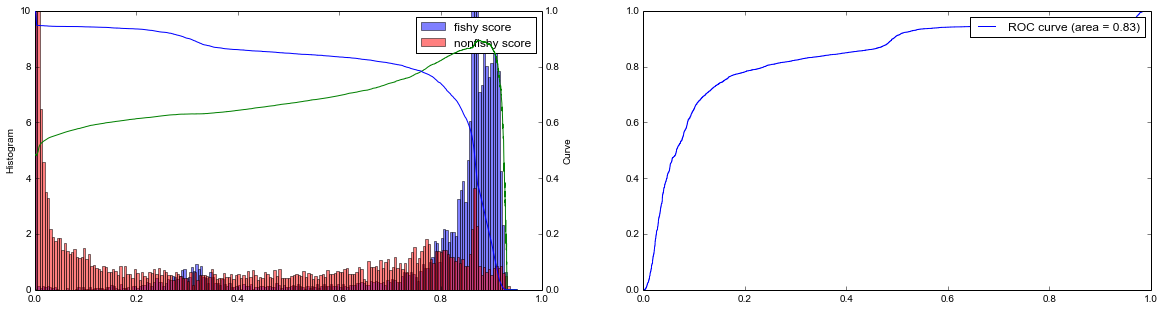

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.81      0.61      0.69      7767
    fishing       0.67      0.85      0.75      7233

avg / total       0.74      0.72      0.72     15000

False positive rate: 0.203733333333


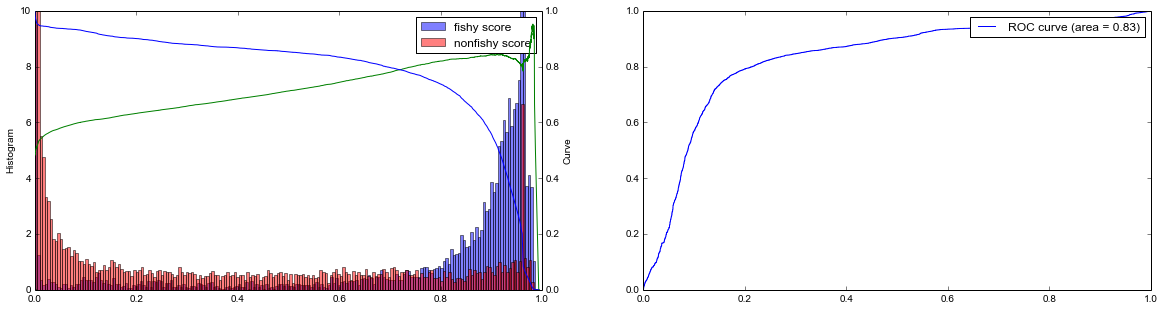

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.83      0.68      0.75      7767
    fishing       0.71      0.85      0.78      7233

avg / total       0.77      0.76      0.76     15000

False positive rate: 0.165866666667


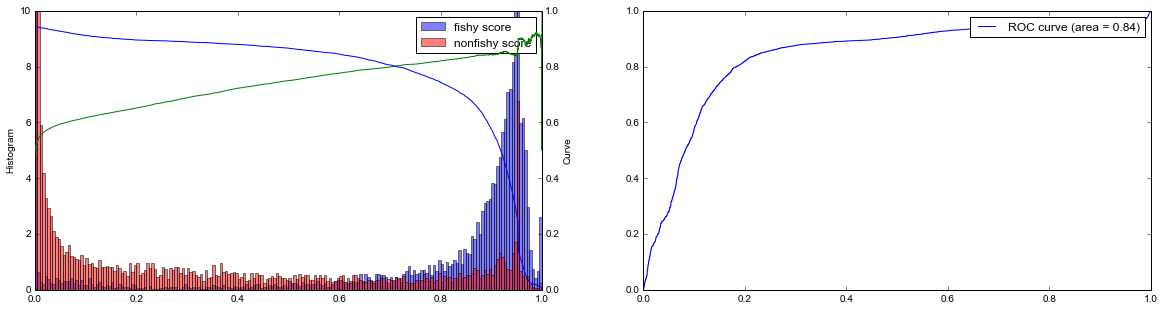

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.85      0.73      0.79      7767
    fishing       0.75      0.87      0.80      7233

avg / total       0.80      0.80      0.80     15000

False positive rate: 0.1394


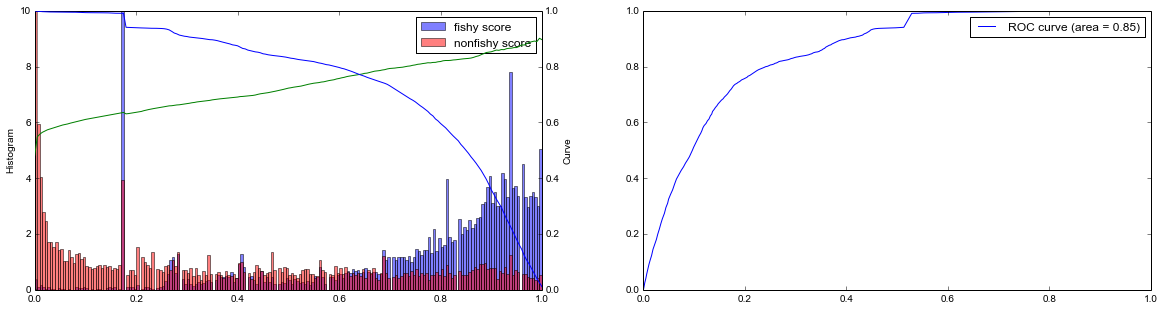

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.82      0.71      0.76      7767
    fishing       0.72      0.83      0.77      7233

avg / total       0.77      0.77      0.77     15000

False positive rate: 0.1524


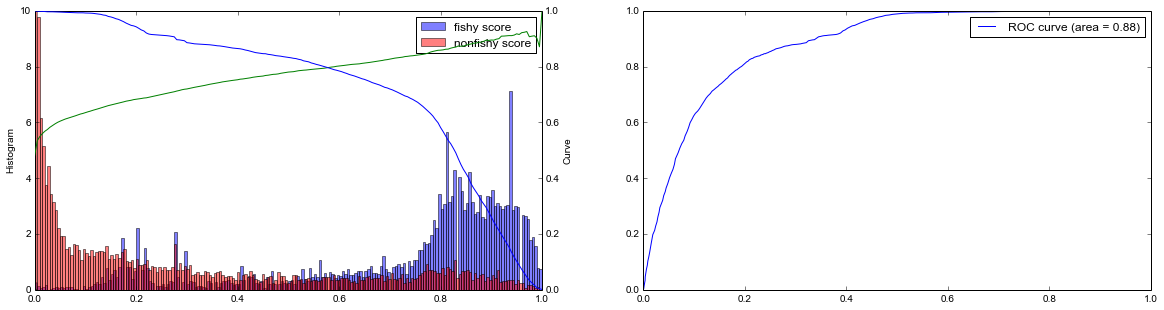

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.83      0.78      0.81      7767
    fishing       0.78      0.83      0.81      7233

avg / total       0.81      0.81      0.81     15000

False positive rate: 0.112466666667


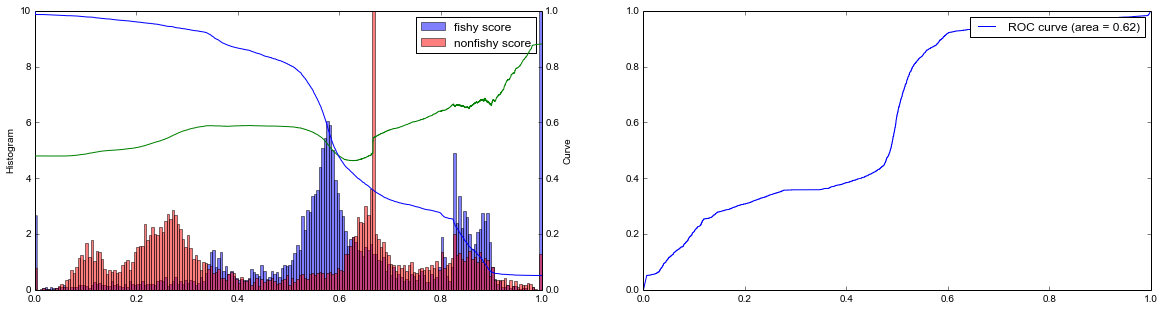

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.72      0.47      0.57      7767
    fishing       0.59      0.81      0.68      7233

avg / total       0.66      0.63      0.62     15000

False positive rate: 0.276266666667


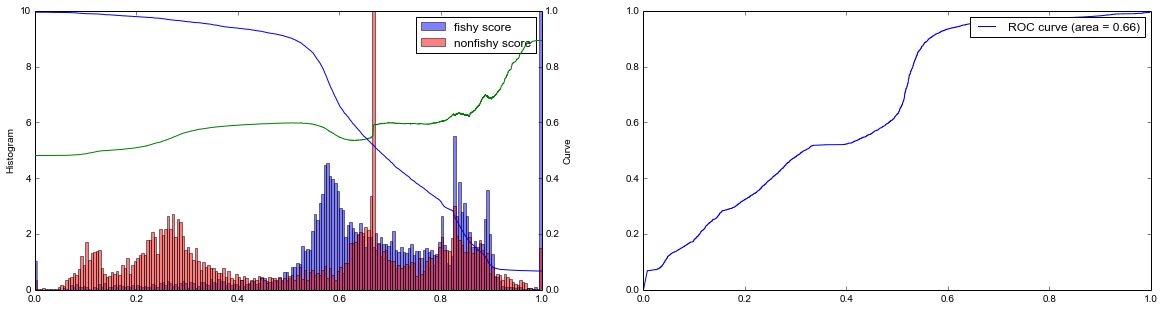

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.83      0.43      0.57      7767
    fishing       0.60      0.90      0.72      7233

avg / total       0.72      0.66      0.64     15000

False positive rate: 0.293733333333


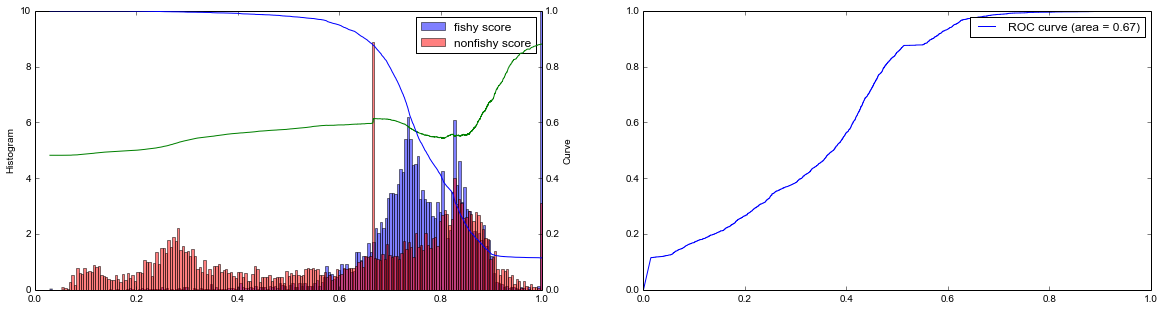

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.95      0.33      0.49      7767
    fishing       0.58      0.98      0.73      7233

avg / total       0.77      0.64      0.60     15000

False positive rate: 0.348266666667


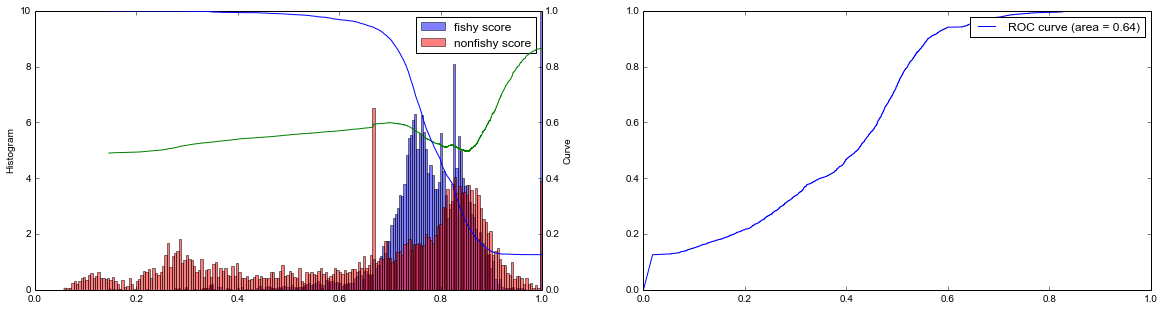

For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.96      0.26      0.41      7767
    fishing       0.55      0.99      0.71      7233

avg / total       0.76      0.61      0.56     15000

False positive rate: 0.382066666667


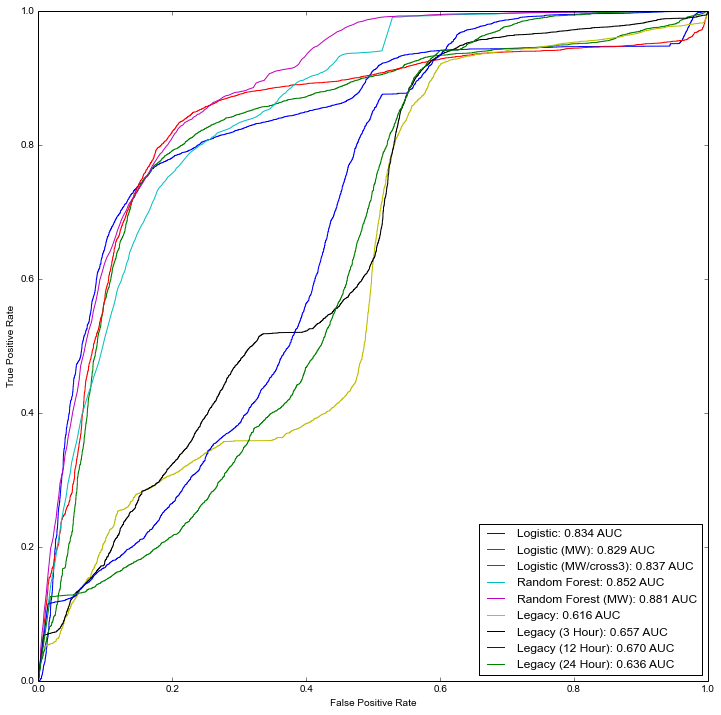

In [24]:
import evaluate_model; reload(evaluate_model)
from evaluate_model import evaluate_model, train_model, compare_auc

display(HTML("<h1>Overall Comparison</h1>"))
for name, mdl in trained_models:
    evaluate_model(mdl, xtest, name=name)

display(HTML("<h1>Overall AUC comparison</h1>"))
compare_auc(trained_models, xtest)



****************************************************************
longliner
****************************************************************


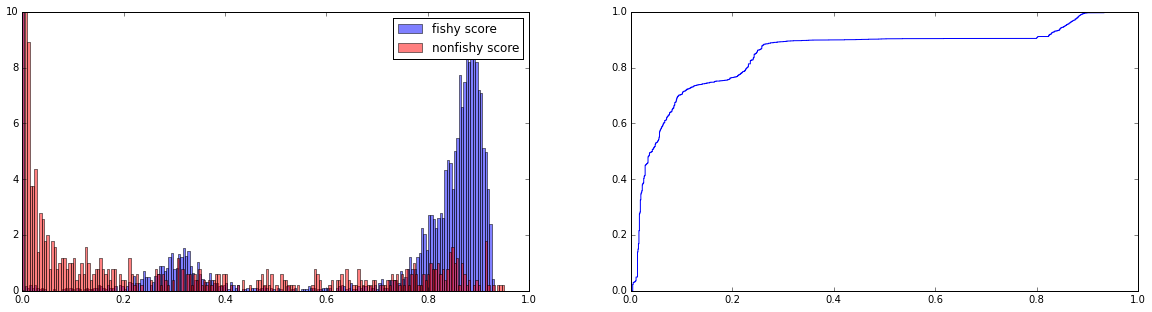

Logistic

AUC: 0.850956708083
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.47      0.82      0.60      1061
    fishing       0.94      0.75      0.84      3939

avg / total       0.84      0.77      0.79      5000

False positive rate: 0.0374


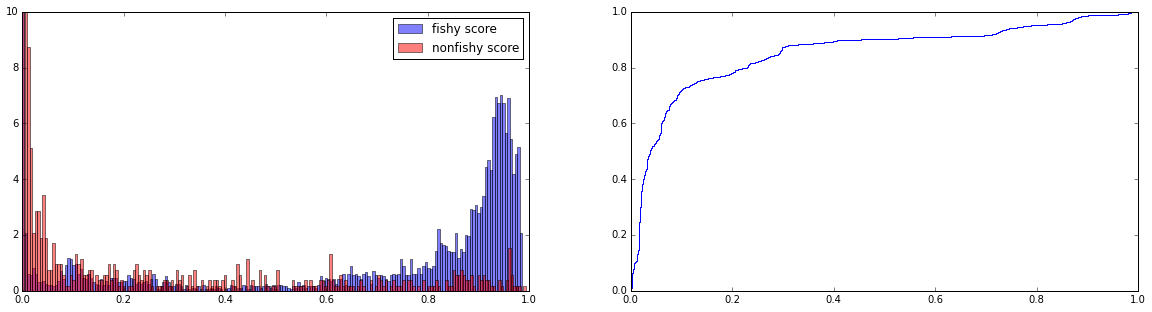

Logistic (MW)

AUC: 0.856107237636
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.48      0.87      0.62      1061
    fishing       0.95      0.75      0.84      3939

avg / total       0.85      0.78      0.79      5000

False positive rate: 0.0286


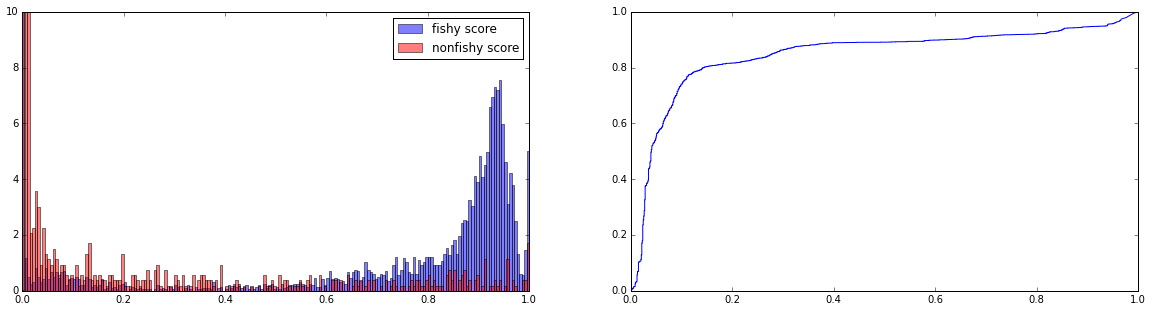

Logistic (MW/cross3)

AUC: 0.84649971921
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.52      0.87      0.65      1061
    fishing       0.96      0.79      0.86      3939

avg / total       0.87      0.81      0.82      5000

False positive rate: 0.0278


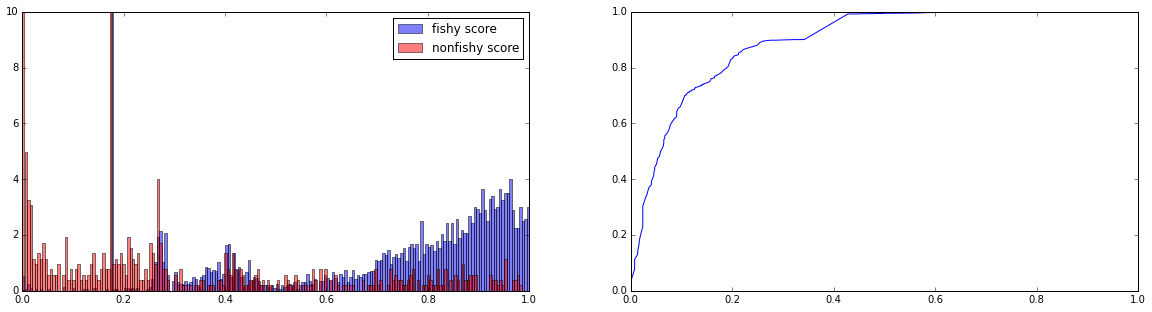

Random Forest

AUC: 0.894319690071
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.47      0.86      0.61      1061
    fishing       0.95      0.74      0.83      3939

avg / total       0.85      0.76      0.78      5000

False positive rate: 0.0298


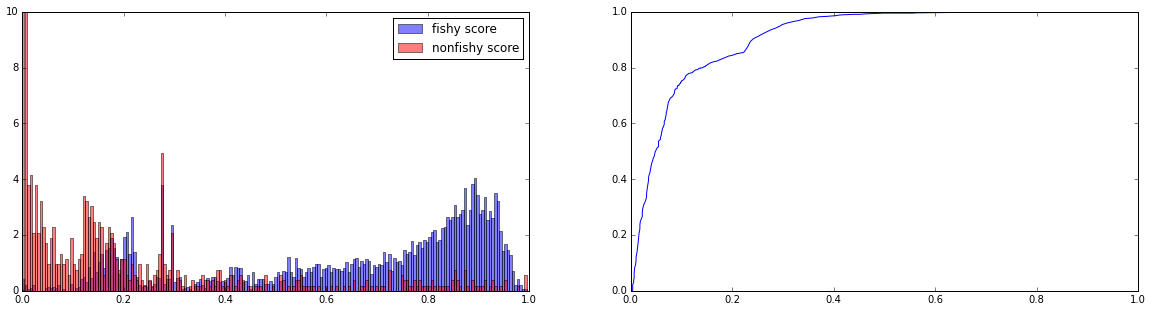

Random Forest (MW)

AUC: 0.912939648202
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.47      0.91      0.62      1061
    fishing       0.97      0.73      0.83      3939

avg / total       0.86      0.77      0.79      5000

False positive rate: 0.0194


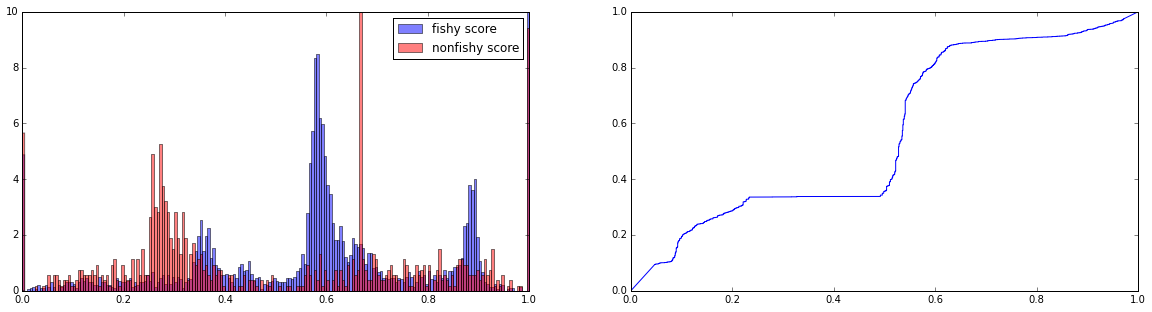

Legacy

AUC: 0.563166517478
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.31      0.44      0.37      1061
    fishing       0.83      0.74      0.78      3939

avg / total       0.72      0.68      0.69      5000

False positive rate: 0.1182


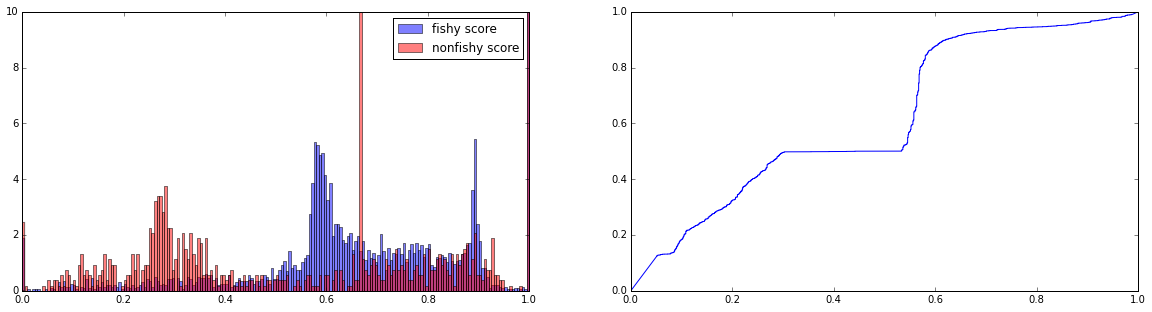

Legacy (3 Hour)

AUC: 0.619254062722
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.45      0.41      0.43      1061
    fishing       0.84      0.86      0.85      3939

avg / total       0.76      0.77      0.76      5000

False positive rate: 0.1256


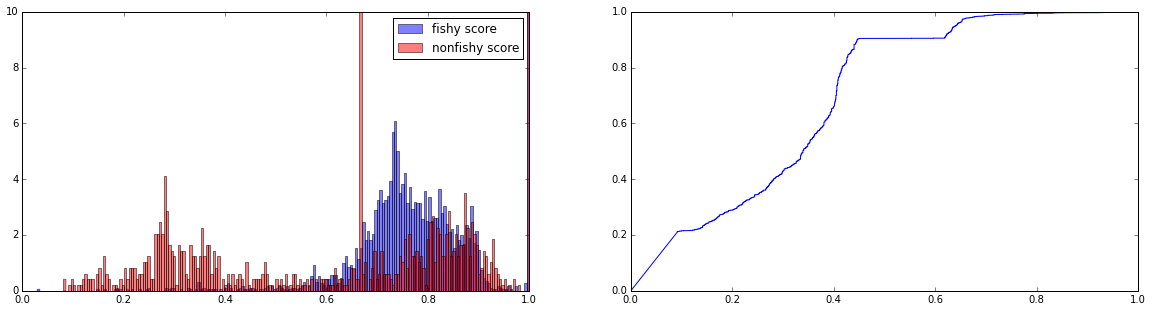

Legacy (12 Hour)

AUC: 0.694061463712
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.83      0.32      0.46      1061
    fishing       0.84      0.98      0.91      3939

avg / total       0.84      0.84      0.81      5000

False positive rate: 0.1438


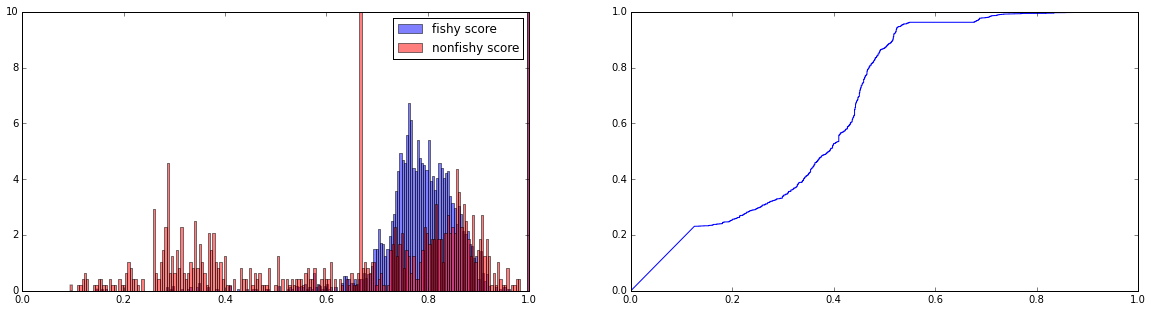

Legacy (24 Hour)

AUC: 0.663851228884
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.90      0.26      0.40      1061
    fishing       0.83      0.99      0.91      3939

avg / total       0.85      0.84      0.80      5000

False positive rate: 0.1572


AUC comparison for longliner


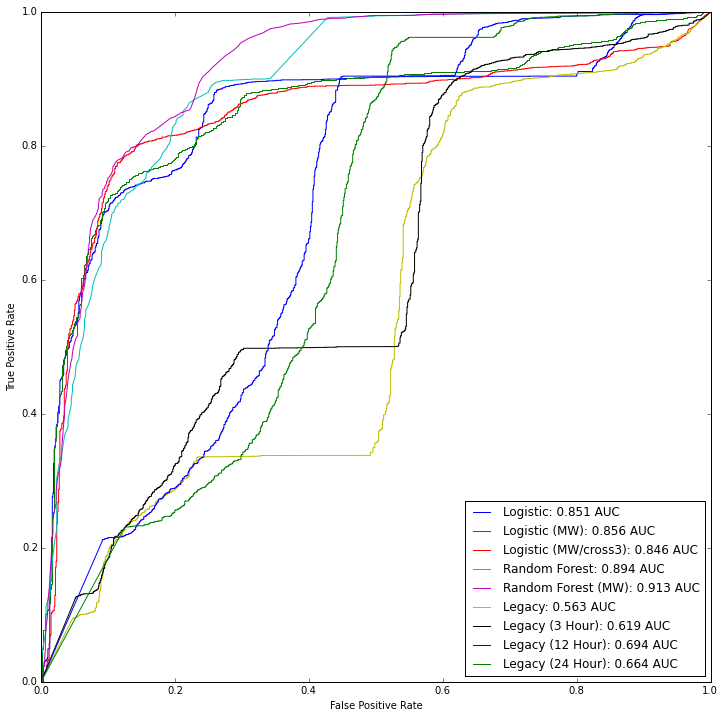



****************************************************************
trawler
****************************************************************


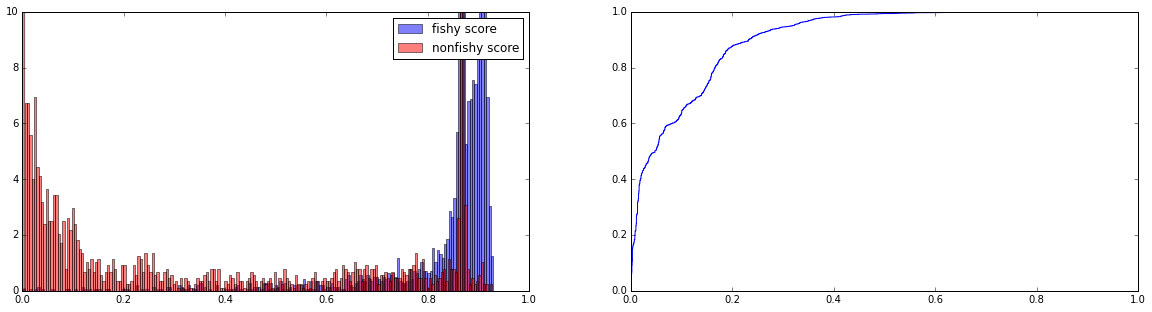

Logistic

AUC: 0.909280524106
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.93      0.65      0.76      1892
    fishing       0.82      0.97      0.89      3108

avg / total       0.86      0.85      0.84      5000

False positive rate: 0.133


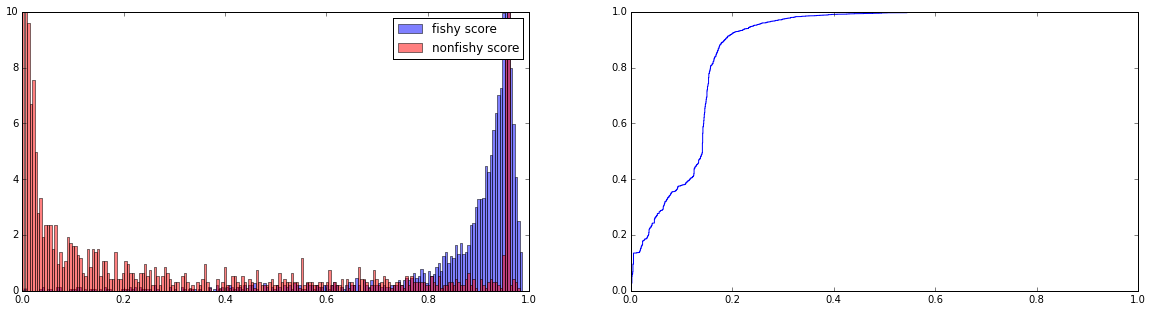

Logistic (MW)

AUC: 0.883502490334
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.93      0.72      0.81      1892
    fishing       0.85      0.97      0.90      3108

avg / total       0.88      0.87      0.87      5000

False positive rate: 0.1078


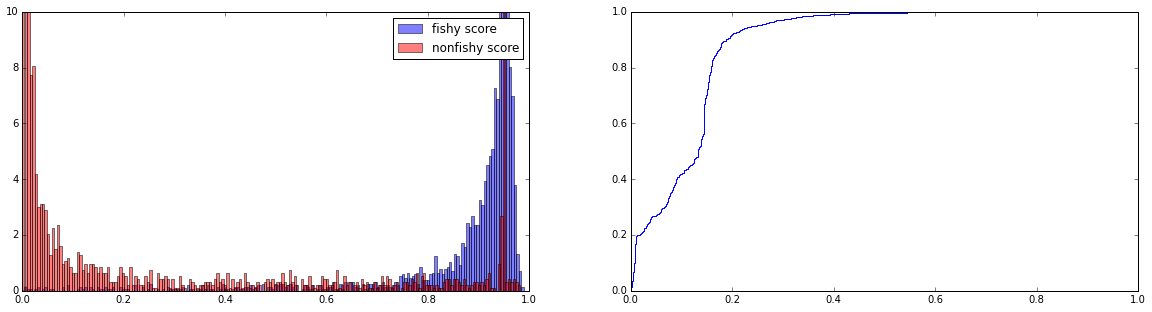

Logistic (MW/cross3)

AUC: 0.886936562809
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.92      0.73      0.81      1892
    fishing       0.85      0.96      0.90      3108

avg / total       0.88      0.87      0.87      5000

False positive rate: 0.1034


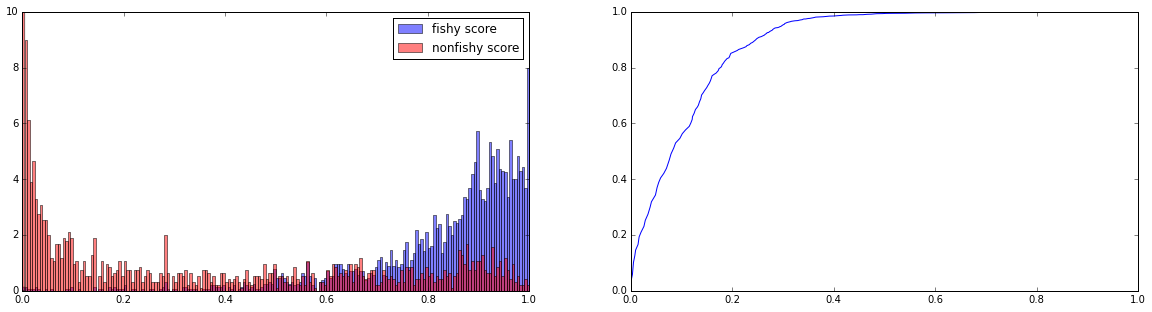

Random Forest

AUC: 0.89190617679
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.91      0.70      0.79      1892
    fishing       0.84      0.96      0.89      3108

avg / total       0.86      0.86      0.85      5000

False positive rate: 0.1146


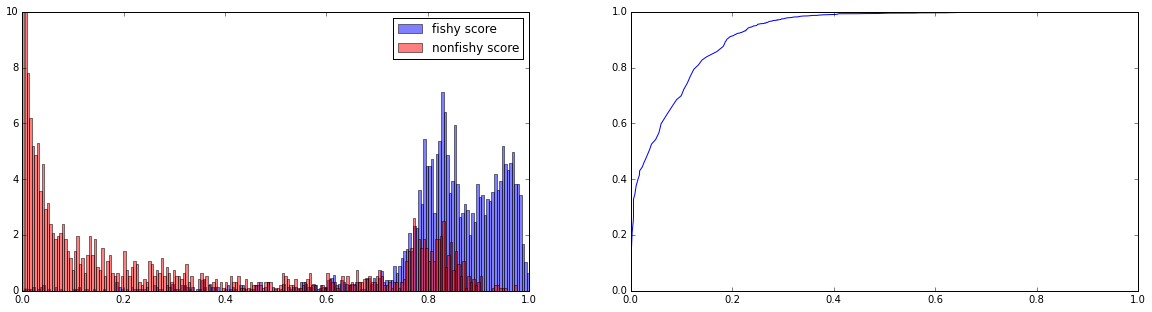

Random Forest (MW)

AUC: 0.92817519271
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.92      0.74      0.82      1892
    fishing       0.86      0.96      0.90      3108

avg / total       0.88      0.87      0.87      5000

False positive rate: 0.1


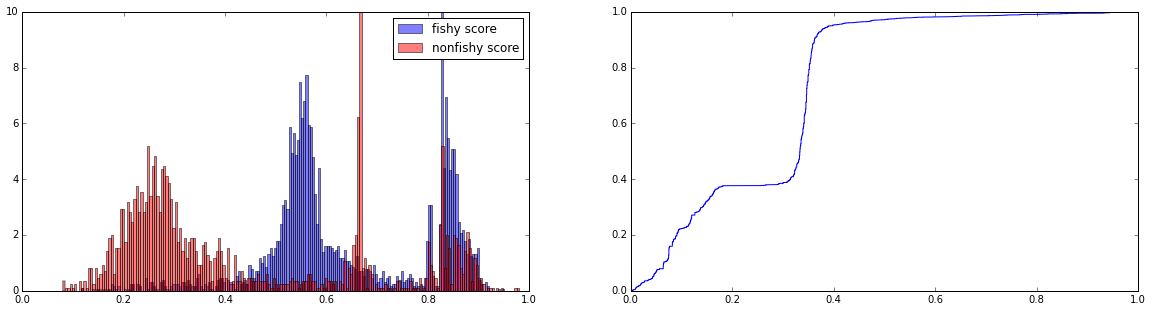

Legacy

AUC: 0.738175675676
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.77      0.64      0.70      1892
    fishing       0.80      0.88      0.84      3108

avg / total       0.79      0.79      0.79      5000

False positive rate: 0.1356


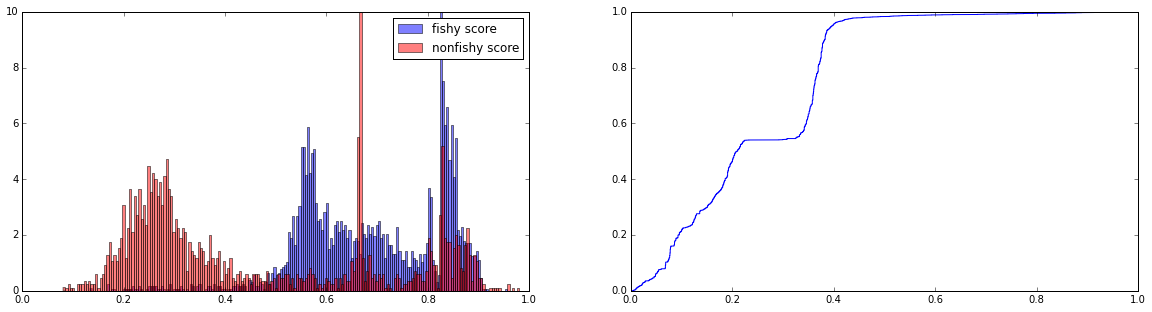

Legacy (3 Hour)

AUC: 0.755519752613
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.88      0.60      0.72      1892
    fishing       0.80      0.95      0.87      3108

avg / total       0.83      0.82      0.81      5000

False positive rate: 0.151


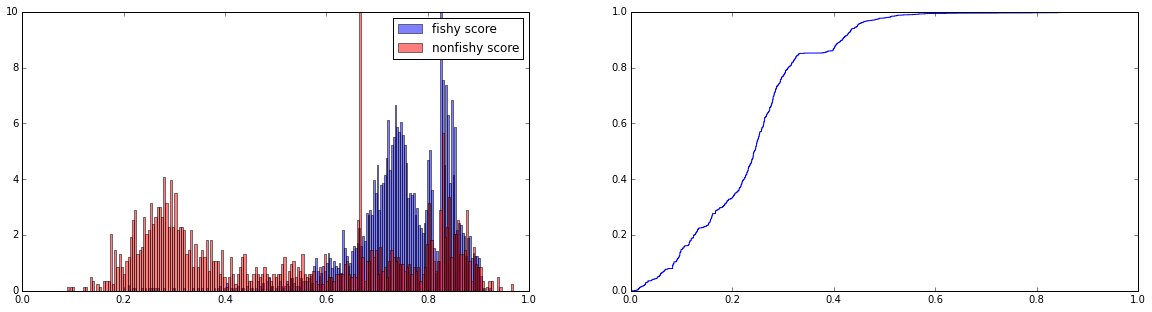

Legacy (12 Hour)

AUC: 0.759403544287
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.94      0.49      0.65      1892
    fishing       0.76      0.98      0.86      3108

avg / total       0.83      0.80      0.78      5000

False positive rate: 0.1912


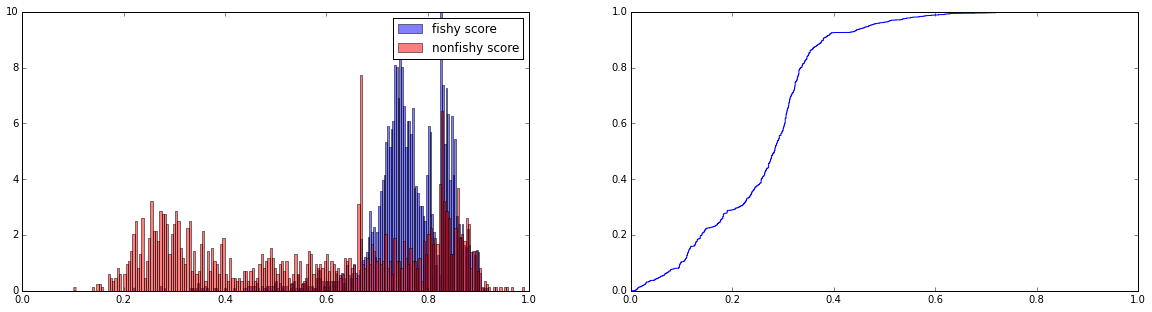

Legacy (24 Hour)

AUC: 0.737186616547
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.94      0.42      0.58      1892
    fishing       0.74      0.98      0.84      3108

avg / total       0.81      0.77      0.74      5000

False positive rate: 0.2186


AUC comparison for trawler


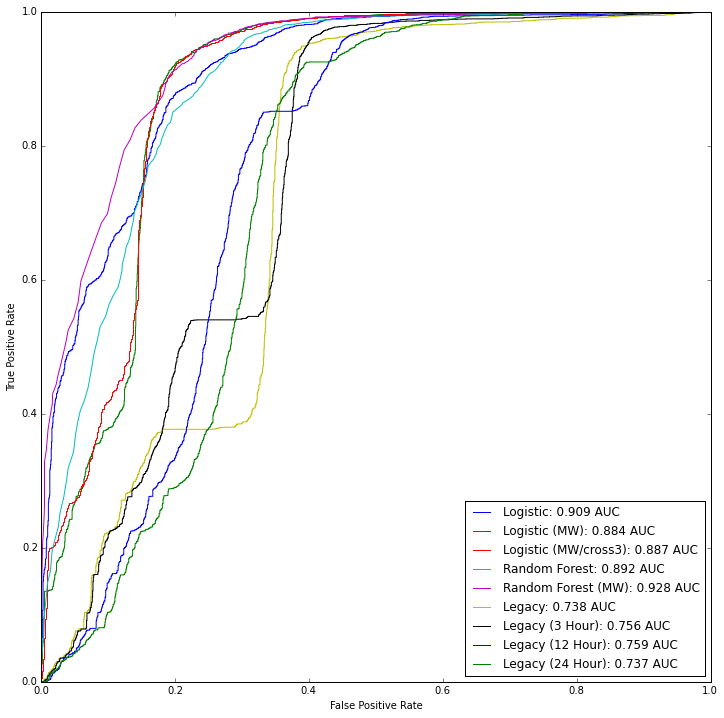



****************************************************************
purse seine
****************************************************************


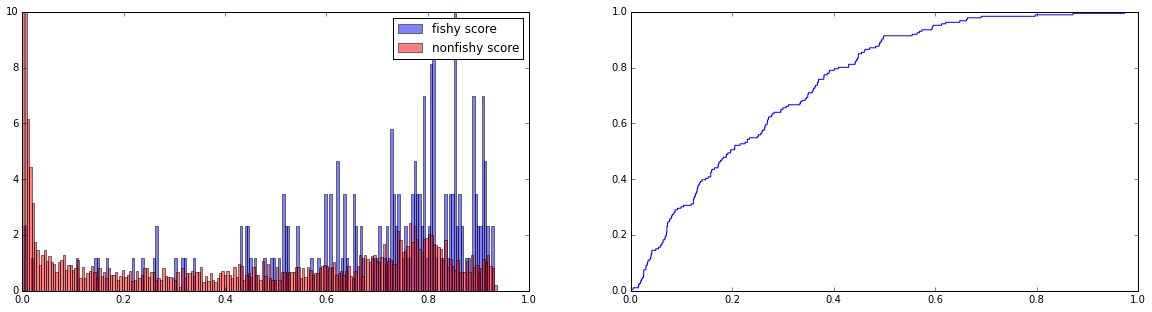

Logistic

AUC: 0.753436996038
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.99      0.54      0.70      4814
    fishing       0.07      0.85      0.12       186

avg / total       0.96      0.55      0.68      5000

False positive rate: 0.4408


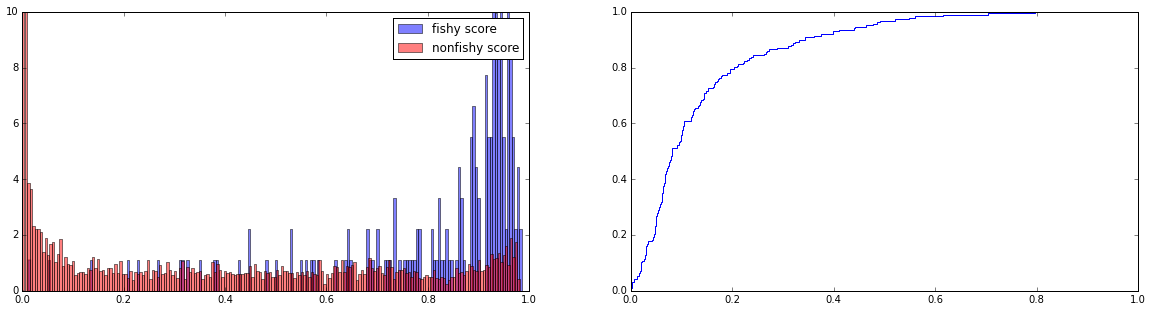

Logistic (MW)

AUC: 0.862143792076
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.99      0.64      0.78      4814
    fishing       0.09      0.91      0.16       186

avg / total       0.96      0.65      0.75      5000

False positive rate: 0.3506


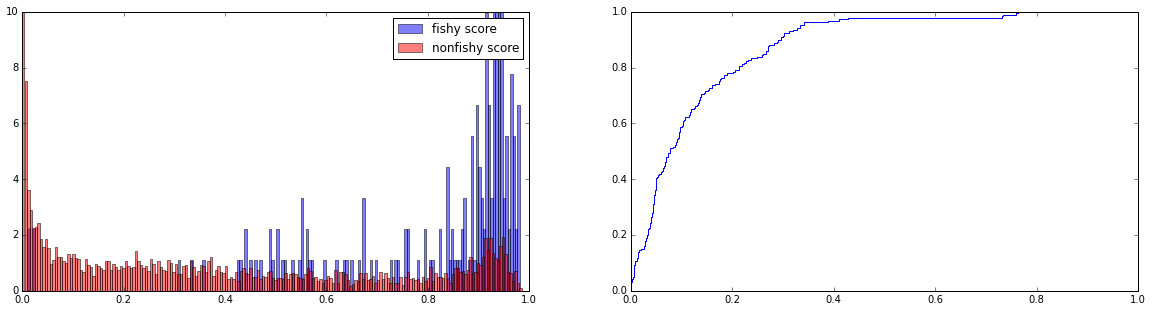

Logistic (MW/cross3)

AUC: 0.875380275272
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.99      0.70      0.82      4814
    fishing       0.11      0.91      0.19       186

avg / total       0.96      0.71      0.80      5000

False positive rate: 0.2866


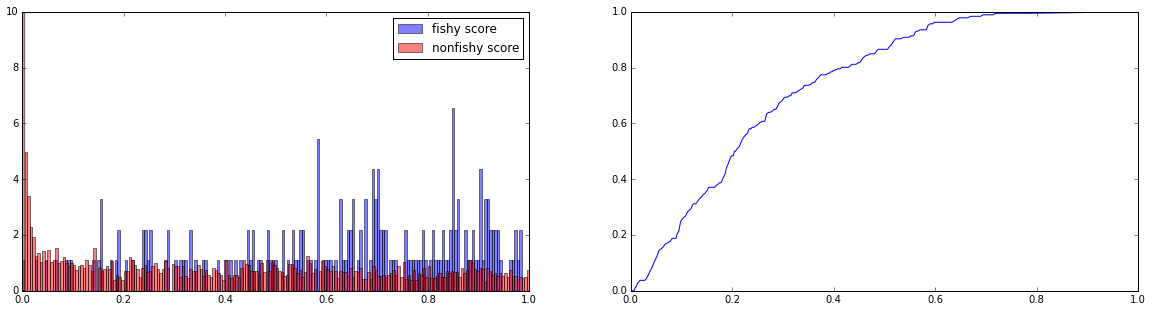

Random Forest

AUC: 0.750411546073
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.98      0.68      0.80      4814
    fishing       0.08      0.71      0.14       186

avg / total       0.95      0.68      0.78      5000

False positive rate: 0.3128


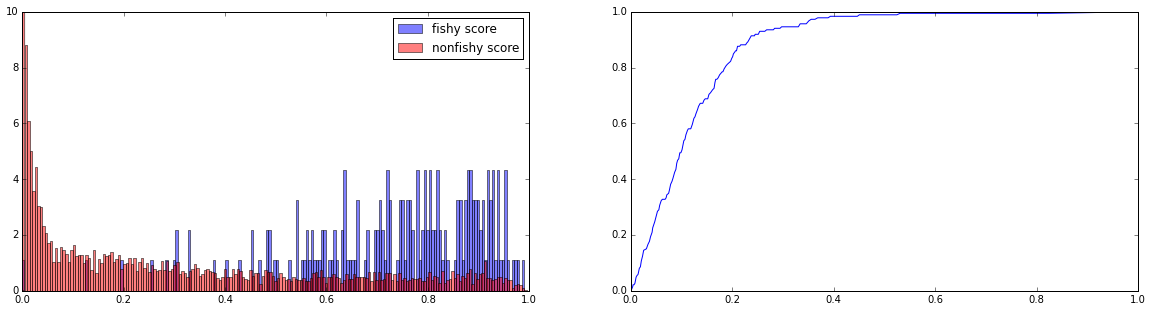

Random Forest (MW)

AUC: 0.877985803056
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.99      0.77      0.87      4814
    fishing       0.13      0.88      0.23       186

avg / total       0.96      0.78      0.85      5000

False positive rate: 0.218


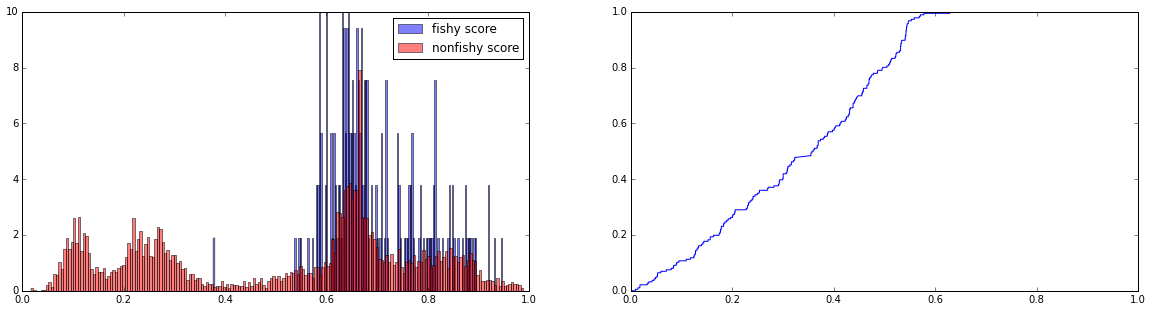

Legacy

AUC: 0.668100097833
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       1.00      0.40      0.57      4814
    fishing       0.06      0.99      0.11       186

avg / total       0.96      0.42      0.56      5000

False positive rate: 0.575


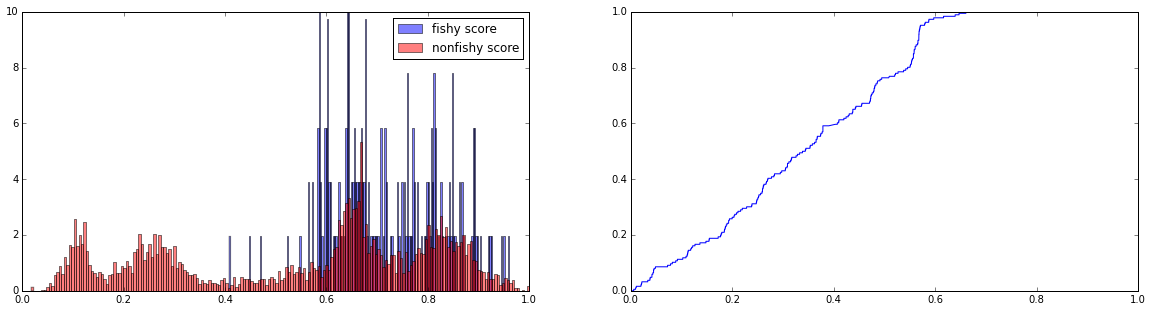

Legacy (3 Hour)

AUC: 0.661697401396
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       1.00      0.37      0.54      4814
    fishing       0.06      0.98      0.11       186

avg / total       0.96      0.39      0.53      5000

False positive rate: 0.6046


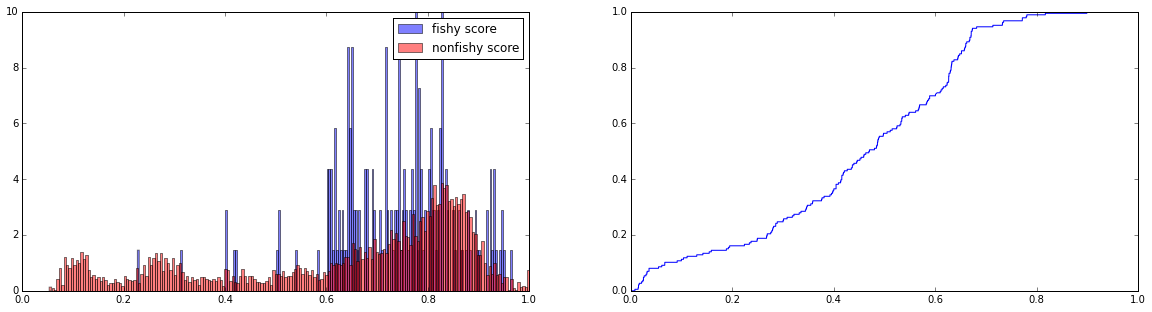

Legacy (12 Hour)

AUC: 0.559820483268
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       1.00      0.26      0.42      4814
    fishing       0.05      0.97      0.09       186

avg / total       0.96      0.29      0.40      5000

False positive rate: 0.7098


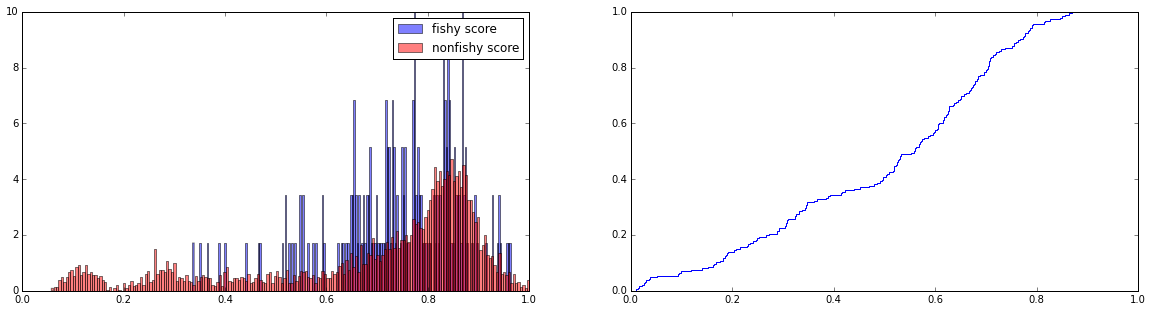

Legacy (24 Hour)

AUC: 0.502618929556
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.99      0.20      0.33      4814
    fishing       0.04      0.96      0.08       186

avg / total       0.96      0.23      0.32      5000

False positive rate: 0.7704


AUC comparison for purse seine


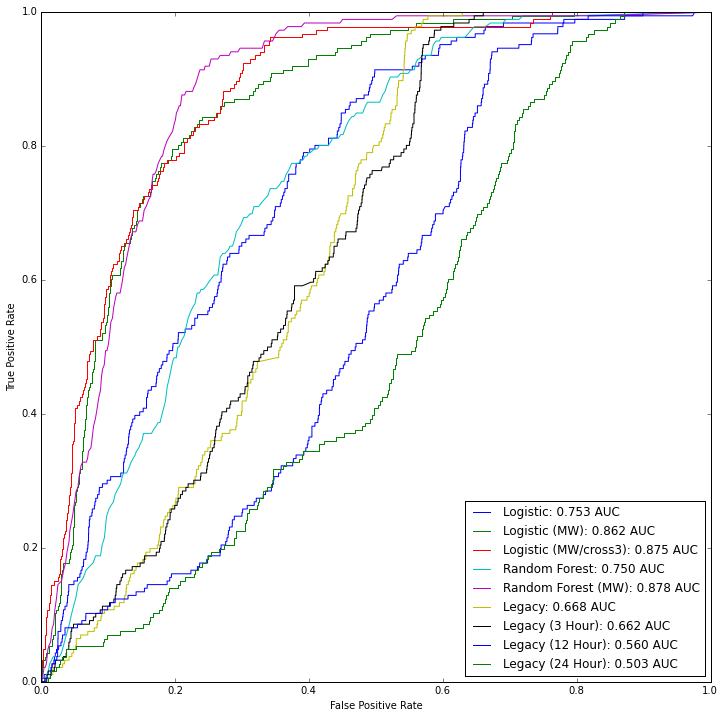

In [6]:
for vessel_class, xtest_class in  [("longliner", xtest_lline), 
                                   ("trawler", xtest_trawl), 
                                   ("purse seine", xtest_pseine)]:
    print
    print
    print "*" * 64
    print vessel_class
    print "*" * 64
    for name, mdl in trained_models:
        evaluate_model(mdl, xtest_class, name=name)
    print
    print
    print "AUC comparison for", vessel_class
    compare_auc(trained_models, xtest_class)